In [50]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math

In [51]:
def dydx(x,y):
    return 1/np.cos(x) - y*np.tan(x)

In [68]:
range = (np.pi/4, 10)
range_left = (range[0], -range[1])
x_pts = np.linspace(*range, 1000)
x_left = np.linspace(*range_left, 1000)
result = integrate.solve_ivp(dydx, range, [1], t_eval=x_pts)
result_left = integrate.solve_ivp(dydx, range_left, [1], t_eval=x_left)
result

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 7.854e-01  7.946e-01 ...  9.991e+00  1.000e+01]
        y: [[ 1.000e+00  1.004e+00 ...  3.067e-01  2.939e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 188
     njev: 0
      nlu: 0

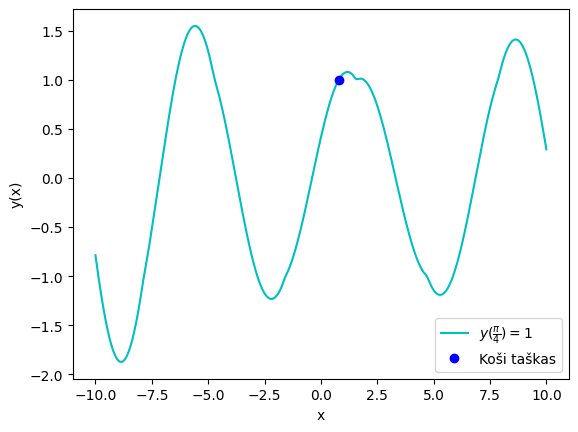

In [69]:
[plt.plot(result.t, ya, "c", label = l) for ya, l in zip(result.y, ["$y(\\frac{\pi}{4})=1$"])]
plt.plot(result_left.t, result_left.y[0], "c")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.plot(np.pi/4, 1, 'bo', label="Koši taškas")
plt.legend()

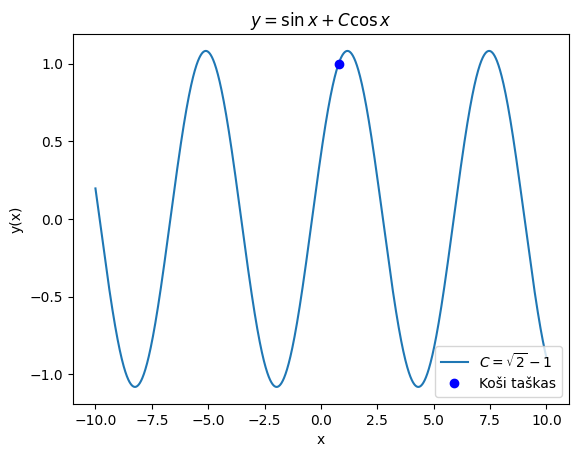

In [65]:
def f(x, C):
    return np.sin(x) + C*np.cos(x)
arr = np.concatenate((np.flipud(result_left.t), result.t), axis=0)
[plt.plot(arr, [f(t, c) for t in arr], label="$C=\sqrt{2}-1$") for c in [np.sqrt(2)-1]]
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("$y=\sin{x} + C\cos{x}$")
plt.plot(np.pi/4, 1, 'bo', label="Koši taškas")
plt.legend()
plt.show()